In [130]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [131]:
df = pd.read_csv("train_pre.csv")
df.head()

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,0,34235,29506,1686,14.846518,3.883525,8.103828,0.231920,6.626665,64,-90.969697,-9438.106061
1,0,17671,-331,1382,-49.961485,-16.854685,-2.481652,-0.546816,-4.106299,-206,113.587704,1601.149290
2,0,-3688,-733,105,-24.768949,-9.201969,-4.758317,-0.490702,-2.986516,-92,-58.594502,-5722.563574
3,0,19542,17630,276,565.184032,390.016375,26.220532,7.067053,29.271279,1756,21.469296,1299.678967
4,1,-38035,849,-2460,-127.252413,-33.417223,-21.117111,-2.213765,-19.298035,-466,-78.904293,-840.220036


In [132]:
np.any(df.isnull())

False

In [133]:
df.shape

(5500, 12)

In [134]:
df.size

66000

In [135]:
df.describe()

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,3.560291e+04,7.931036e+01,-49.304909,-1.114342e+02,-35.221885,0.087785,-0.003688,0.415091,-12.834364,0.218986,-2.044277
std,0.499956,2.724394e+06,7.043435e+04,21248.786134,3.826375e+04,14335.255249,13.497549,2.706191,26.374714,38911.503783,147.537349,8004.969474
min,0.000000,-3.506800e+07,-1.162212e+06,-518386.000000,-1.143815e+06,-435394.770300,-76.709011,-15.933596,-192.971915,-915090.000000,-1078.000000,-142621.361500
25%,0.000000,-1.779708e+05,-1.501000e+03,-3638.500000,-1.814826e+02,-64.416753,-4.286998,-0.736936,-5.202471,-676.000000,-61.516295,-2129.051230
50%,1.000000,-1.500000e+01,-1.600000e+01,-6.000000,1.458770e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.796970
75%,1.000000,1.838008e+05,1.384750e+03,3477.250000,1.827743e+02,62.624442,4.320936,0.729064,5.491086,671.000000,59.634217,2151.743979
max,1.000000,3.619107e+07,6.643230e+05,544716.000000,1.144742e+06,435624.675000,76.709011,16.190036,192.971915,918957.000000,1816.719697,74409.992420


In [136]:
df.columns.values

array(['Choice', 'follower_count', 'following_count', 'listed_count',
       'mentions_received', 'retweets_received', 'mentions_sent',
       'retweets_sent', 'posts', 'network_feature_1', 'network_feature_2',
       'network_feature_3'], dtype=object)

In [137]:
df_norm = (df - df.mean()) / (df.max() - df.min())

In [138]:
df_norm.head()

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,-0.509455,-0.000019,0.016111,0.001632,0.000055,0.000045,0.052250,0.007334,0.016095,0.000042,-0.031502,-0.043478
1,-0.509455,-0.000252,-0.000225,0.001346,0.000027,0.000021,-0.016748,-0.016907,-0.011715,-0.000105,0.039164,0.007387
2,-0.509455,-0.000551,-0.000445,0.000145,0.000038,0.000030,-0.031588,-0.015161,-0.008814,-0.000043,-0.020318,-0.026358
3,-0.509455,-0.000225,0.009609,0.000306,0.000296,0.000488,0.170337,0.220110,0.074768,0.000964,0.007341,0.005998
4,0.490545,-0.001033,0.000421,-0.002268,-0.000007,0.000002,-0.138216,-0.068799,-0.051078,-0.000247,-0.027334,-0.003862


In [139]:
X = df_norm.iloc[:,:12]
X.head()

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,-0.509455,-0.000019,0.016111,0.001632,0.000055,0.000045,0.052250,0.007334,0.016095,0.000042,-0.031502,-0.043478
1,-0.509455,-0.000252,-0.000225,0.001346,0.000027,0.000021,-0.016748,-0.016907,-0.011715,-0.000105,0.039164,0.007387
2,-0.509455,-0.000551,-0.000445,0.000145,0.000038,0.000030,-0.031588,-0.015161,-0.008814,-0.000043,-0.020318,-0.026358
3,-0.509455,-0.000225,0.009609,0.000306,0.000296,0.000488,0.170337,0.220110,0.074768,0.000964,0.007341,0.005998
4,0.490545,-0.001033,0.000421,-0.002268,-0.000007,0.000002,-0.138216,-0.068799,-0.051078,-0.000247,-0.027334,-0.003862


In [140]:
T1 = df.loc[:, ['follower_count'].copy()]
(T1.head())

,follower_count
0,34235
1,17671
2,-3688
3,19542
4,-38035


# Scatter Plot with Follower Counts features 

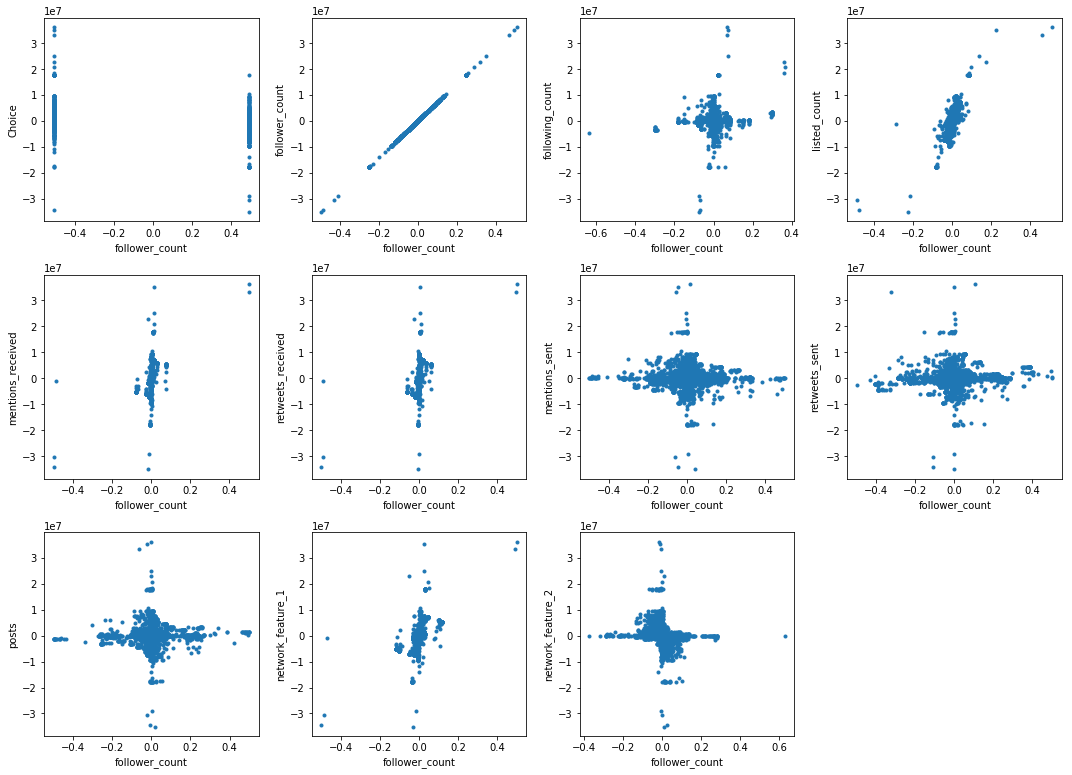

In [141]:
fig = plt.figure(figsize = (15, 14))
for i in range(11):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:,i],T1,'.')
    plt.ylabel(X.columns.values[i])
    plt.xlabel(T1.columns.values[0])
fig.tight_layout() 

In [142]:
T2 = df_norm.loc[:, ['listed_count'].copy()]
(T2.head())

,listed_count
0,0.001632
1,0.001346
2,0.000145
3,0.000306
4,-0.002268


# Scatter Plot with Listed Counts features

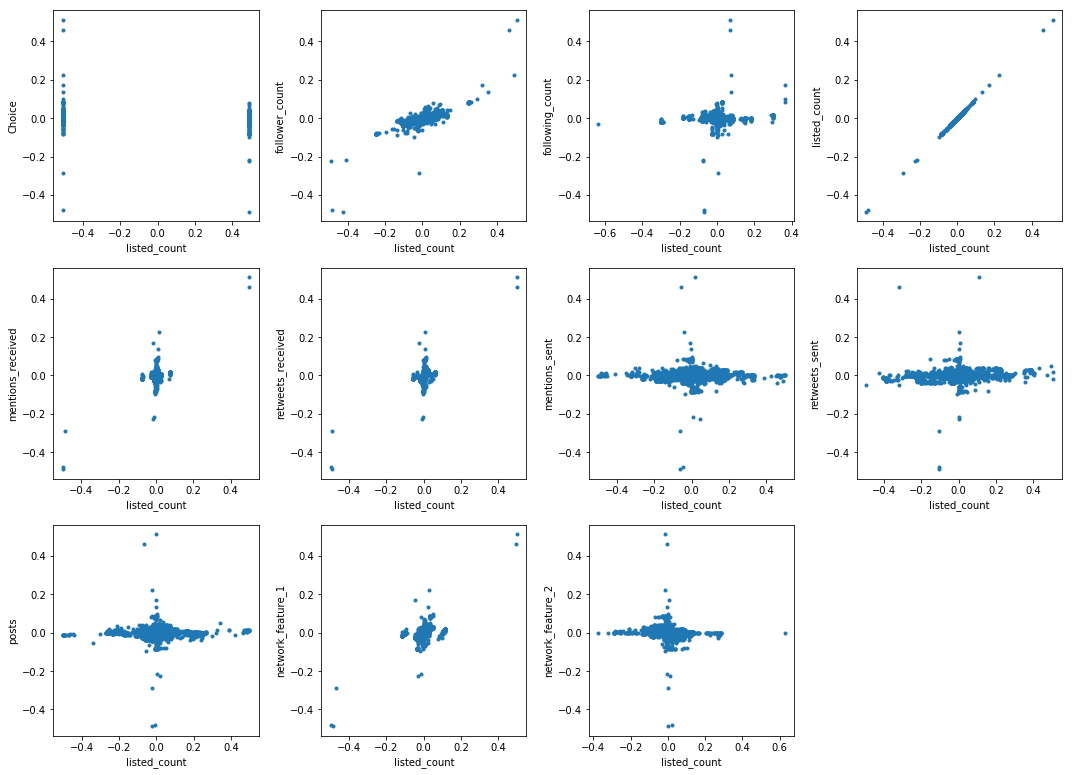

In [143]:
fig = plt.figure(figsize = (15, 14))
for i in range(11):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:,i],T2,'.')
    plt.ylabel(X.columns.values[i])
    plt.xlabel(T2.columns.values[0])
fig.tight_layout()

In [144]:
T3 = df_norm.loc[:, ['retweets_sent'].copy()]
(T3.head())

,retweets_sent
0,0.007334
1,-0.016907
2,-0.015161
3,0.220110
4,-0.068799


# Scatter Plot with Retweets Sent features

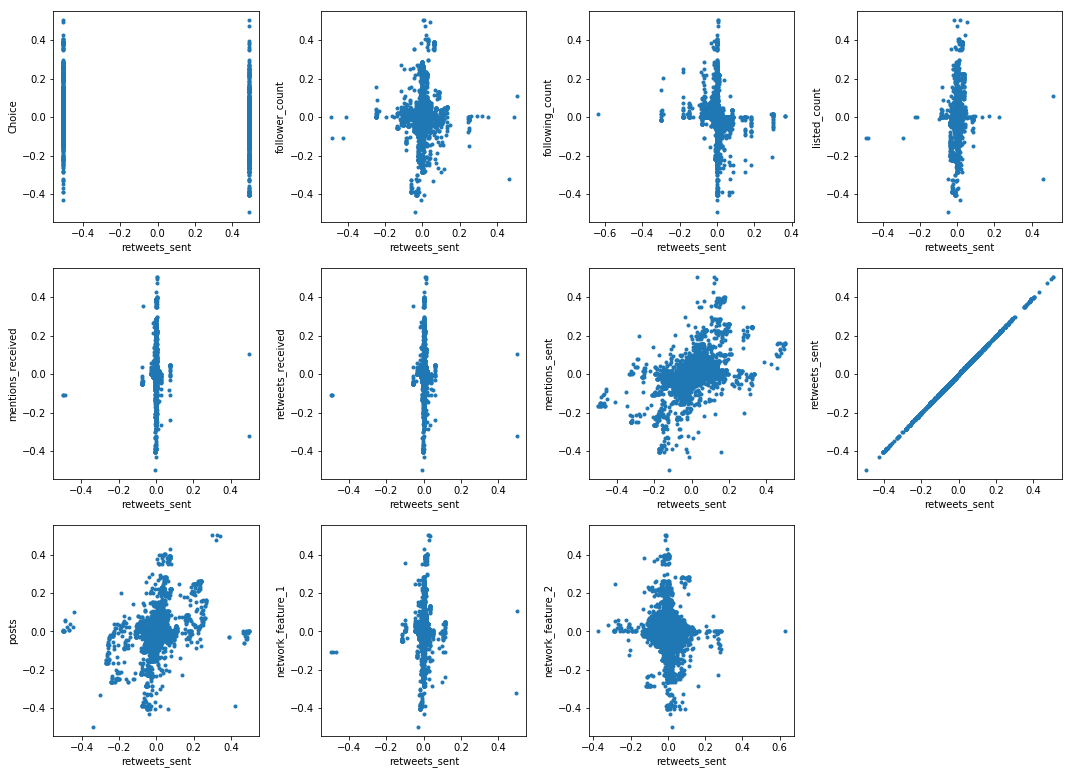

In [145]:
fig = plt.figure(figsize = (15, 14))
for i in range(11):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:,i],T3,'.')
    plt.ylabel(X.columns.values[i])
    plt.xlabel(T3.columns.values[0])
fig.tight_layout()

In [146]:
T4 = df_norm.loc[:, ['mentions_sent'].copy()]
(T4.head())

,mentions_sent
0,0.052250
1,-0.016748
2,-0.031588
3,0.170337
4,-0.138216


# Scatter Plot with Mentions Sent features

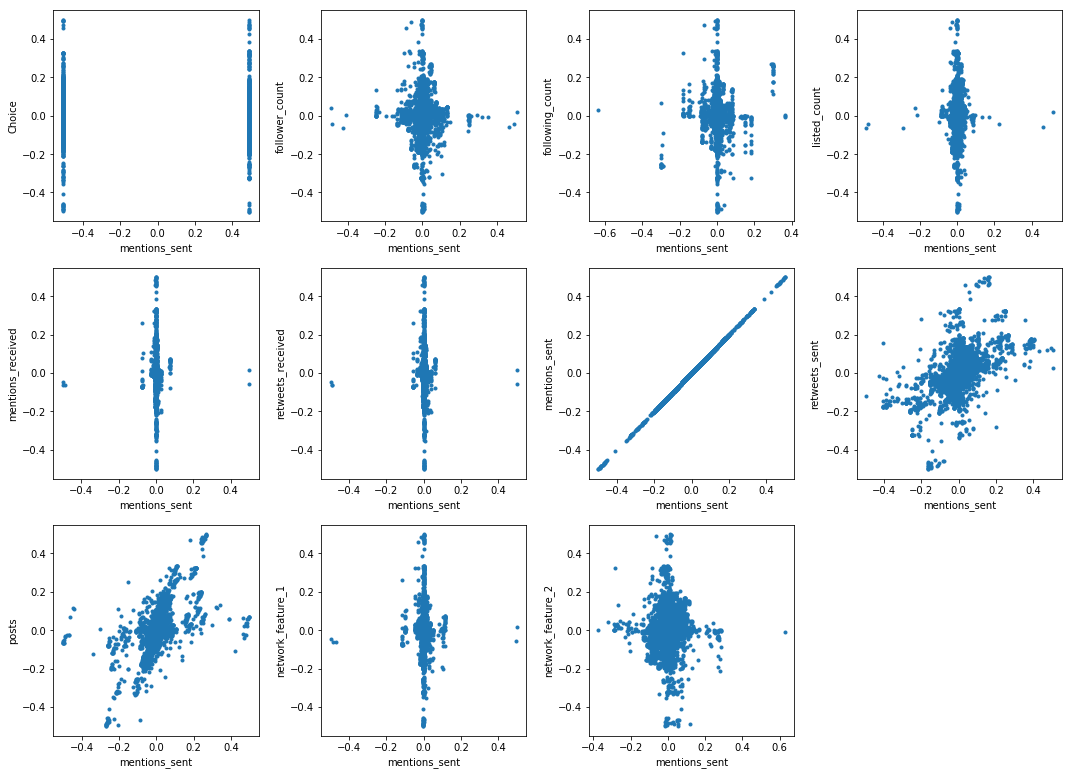

In [149]:
fig = plt.figure(figsize = (15, 14))
for i in range(11):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:,i],T4,'.')
    plt.ylabel(X.columns.values[i])
    plt.xlabel(T4.columns.values[0])
fig.tight_layout()

In [117]:
T5 = df_norm.loc[:, ['posts'].copy()]
(T5.head())

,posts
0,0.016095
1,-0.011715
2,-0.008814
3,0.074768
4,-0.051078


# Scatter Plot with Posts features

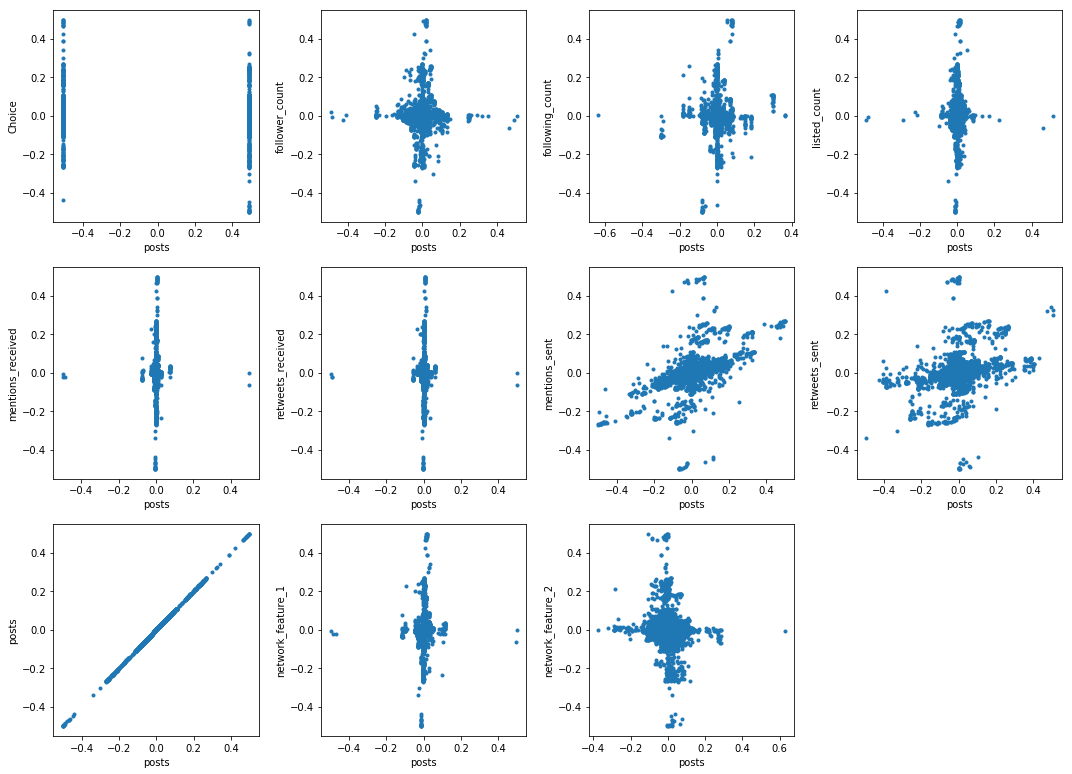

In [118]:
fig = plt.figure(figsize = (15, 14))
for i in range(11):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:,i],T5,'.')
    plt.ylabel(X.columns.values[i])
    plt.xlabel(T5.columns.values[0])
fig.tight_layout()

# Linear Regression to understand Featureset

In [119]:
import numpy as np 
from abc import ABC, abstractmethod
import pandas as pd
import matplotlib.pyplot as plt

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [120]:
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        pass ## TODO: replace this with your codes
        X1 = self.add_ones(X)
        #initial weights with random values
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
    
    # apply the learned model to data X
    def use(self, X):
        pass ## TODO: replace this with your codes
        # Once 1 was added during the training time, but as it was local variable, X need to be updated again
        X1 = self.add_ones(X)
        return (X1 @ self.w) ## TODO: replace this with your codes

In [121]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Least Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        ## TODO: replace this with your codes
        for x,t in zip(X,T):
            self.train_step(x, t)
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        pass  ## TODO: replace this with your codes
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        error = self.w.T @ x - t
        self.w = np.subtract(self.w,self.alpha * error * x)
    
    # apply the current model to data X
    def use(self, X):
        pass  ## TODO: replace this with your codes
        t = self.w.T @ self.add_ones(X).T
        return t.T

# Preliminary Tests

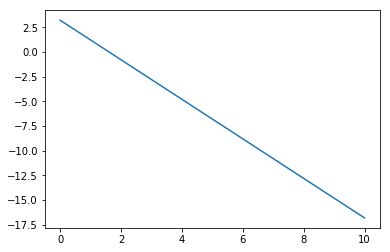

In [122]:
X = np.linspace(0,10, 11).reshape((-1, 1))

T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

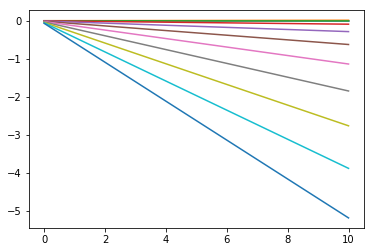

In [123]:
lms = LMS(0.001)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

In [124]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Regression Plots with Featureset

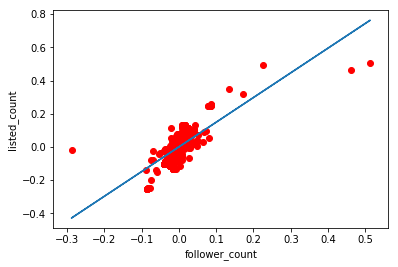

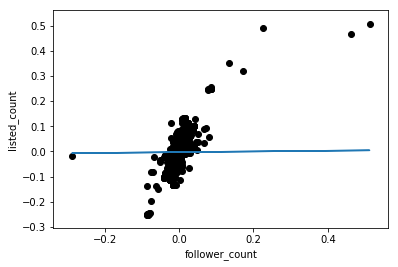

In [150]:
X = df_norm.loc[:,'listed_count'].values.reshape(-1,1) 
T = df_norm.loc[:,'follower_count'].values.reshape(-1,1) 


ls = LinearRegress()
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
ls.train(Xtrain,Ttrain) 
plt.plot(Xtest,ls.use(Xtest)) 
plt.scatter(Xtest,Ttest,color='r') 
plt.ylabel('listed_count') 
plt.xlabel('follower_count') 
plt.show()

lms = LMS(0.01) 
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
plt.scatter(Xtest,Ttest,color='black') 
lms.train(Xtrain,Ttrain) 
plt.plot(Xtest,lms.use(Xtest)) 
plt.ylabel('listed_count') 
plt.xlabel('follower_count') 
plt.show() ;

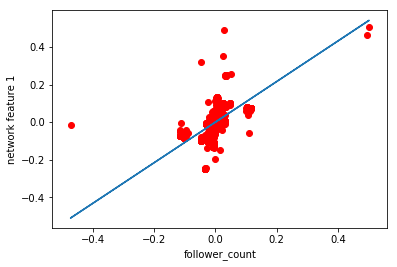

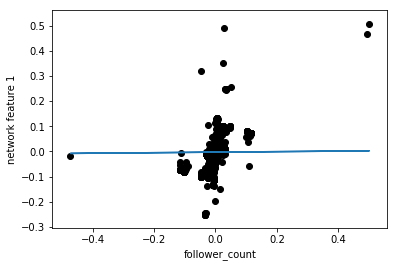

In [31]:
X = df_norm.loc[:,'network_feature_1'].values.reshape(-1,1) 
T = df_norm.loc[:,'follower_count'].values.reshape(-1,1) 


ls = LinearRegress()
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
ls.train(Xtrain,Ttrain) 
plt.plot(Xtest,ls.use(Xtest)) 
plt.scatter(Xtest,Ttest,color='r') 
plt.ylabel('network feature 1') 
plt.xlabel('follower_count') 
plt.show()

lms = LMS(0.01) 
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
plt.scatter(Xtest,Ttest,color='black') 
lms.train(Xtrain,Ttrain) 
plt.plot(Xtest,lms.use(Xtest)) 
plt.ylabel('network feature 1') 
plt.xlabel('follower_count') 
plt.show() ;

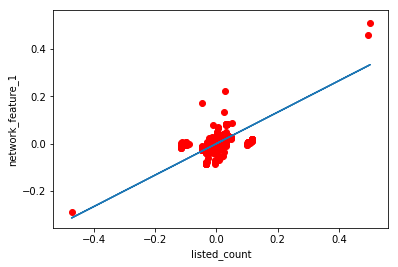

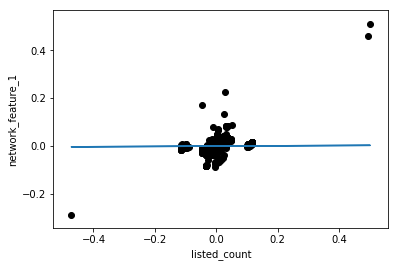

In [35]:
X = df_norm.loc[:,'network_feature_1'].values.reshape(-1,1) 
T = df_norm.loc[:,'listed_count'].values.reshape(-1,1) 


ls = LinearRegress()
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
ls.train(Xtrain,Ttrain) 
plt.plot(Xtest,ls.use(Xtest)) 
plt.scatter(Xtest,Ttest,color='r') 
plt.ylabel('network_feature_1') 
plt.xlabel('listed_count') 
plt.show()

lms = LMS(0.01) 
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
plt.scatter(Xtest,Ttest,color='black') 
lms.train(Xtrain,Ttrain) 
plt.plot(Xtest,lms.use(Xtest)) 
plt.ylabel('network_feature_1') 
plt.xlabel('listed_count') 
plt.show() ;

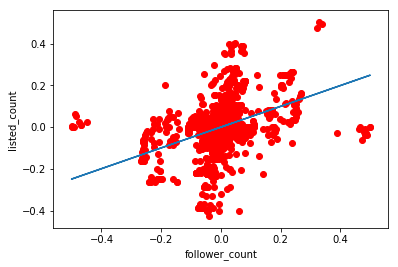

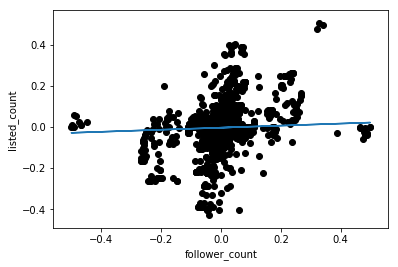

In [95]:
X = df_norm.loc[:,'posts'].values.reshape(-1,1) 
T = df_norm.loc[:,'retweets_sent'].values.reshape(-1,1) 


ls = LinearRegress()
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
ls.train(Xtrain,Ttrain) 
plt.plot(Xtest,ls.use(Xtest)) 
plt.scatter(Xtest,Ttest,color='r') 
plt.ylabel('listed_count') 
plt.xlabel('follower_count') 
plt.show()

lms = LMS(0.01) 
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
plt.scatter(Xtest,Ttest,color='black') 
lms.train(Xtrain,Ttrain) 
plt.plot(Xtest,lms.use(Xtest)) 
plt.ylabel('listed_count') 
plt.xlabel('follower_count') 
plt.show() ;

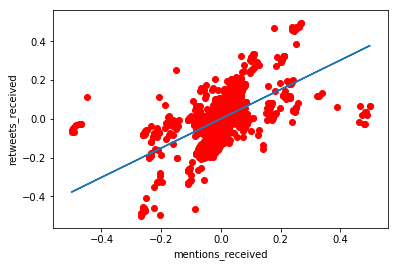

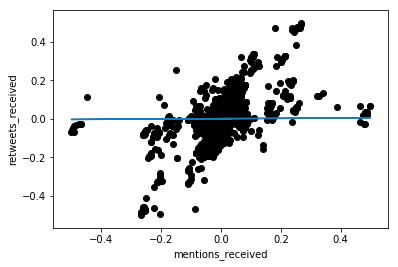

In [96]:
X = df_norm.loc[:,'posts'].values.reshape(-1,1) 
T = df_norm.loc[:,'mentions_sent'].values.reshape(-1,1) 


ls = LinearRegress()
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
ls.train(Xtrain,Ttrain) 
plt.plot(Xtest,ls.use(Xtest)) 
plt.scatter(Xtest,Ttest,color='r') 
plt.ylabel('retweets_received') 
plt.xlabel('mentions_received') 
plt.show()

lms = LMS(0.001) 
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.6, random_state=40)
plt.scatter(Xtest,Ttest,color='black') 
lms.train(Xtrain,Ttrain) 
plt.plot(Xtest,lms.use(Xtest)) 
plt.ylabel('retweets_received') 
plt.xlabel('mentions_received') 
plt.show() ;

# SVM

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm

def classifier(clf1, Xtrain, Ttrain, Xtest, Ttest, accuracy, matrix_header_str):
    start_time = time.time()
    svm.SVC(decision_function_shape='ovo')
    clf1.fit(Xtrain, Ttrain)
    y_pred = clf1.predict(Xtest)
    print(accuracy.format(accuracy_score(Ttest, y_pred) * 100))
    plot_decision_regions(X=Xtrain, y=Ttrain.values,clf=clf1, legend=2)

SVM start!
CNN-SVM Accuracy: 62.8%


Text(0.5,1,'SVM Decision Region Boundary')

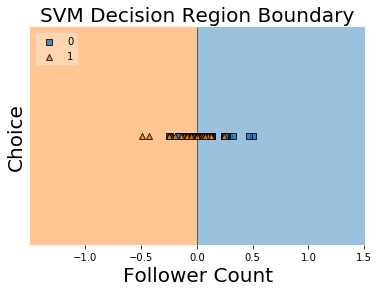

In [153]:
from sklearn.svm import LinearSVC
import time
print('SVM start!')
X = df_norm['follower_count'].values.reshape(-1,1) 
df = pd.read_csv("train_pre.csv")
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Follower Count", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 51.7%


Text(0.5,1,'SVM Decision Region Boundary')

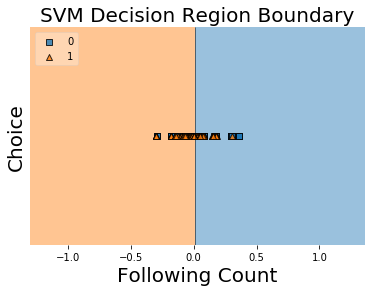

In [154]:
print('SVM start!')
X = df_norm['following_count'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Following Count", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 70.8%


Text(0.5,1,'SVM Decision Region Boundary')

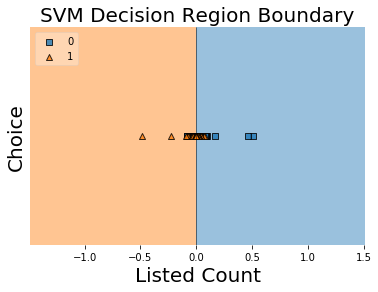

In [21]:
print('SVM start!')
X = df_norm['listed_count'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Listed Count", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 52.6%


Text(0.5,1,'SVM Decision Region Boundary')

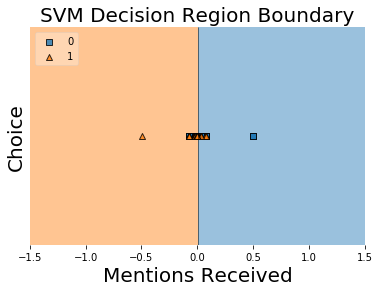

In [22]:
print('SVM start!')
X = df_norm['mentions_received'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Mentions Received", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 53.4%


Text(0.5,1,'SVM Decision Region Boundary')

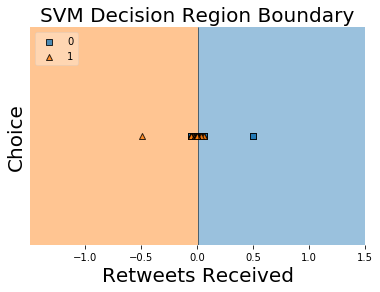

In [23]:
print('SVM start!')
X = df_norm['retweets_received'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Retweets Received", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 64.7%


Text(0.5,1,'SVM Decision Region Boundary')

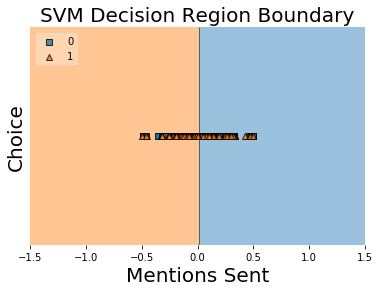

In [24]:
print('SVM start!')
X = df_norm['mentions_sent'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Mentions Sent", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 62.0%


Text(0.5,1,'SVM Decision Region Boundary')

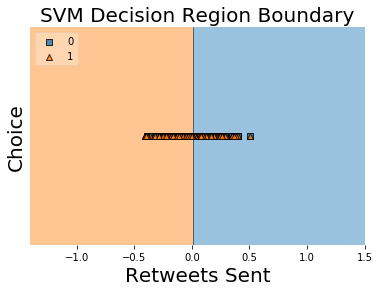

In [25]:
print('SVM start!')
X = df_norm['retweets_sent'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Retweets Sent", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 62.5%


Text(0.5,1,'SVM Decision Region Boundary')

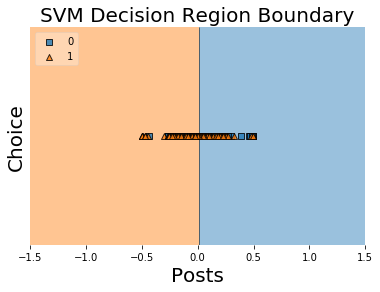

In [26]:
print('SVM start!')
X = df_norm['posts'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Posts", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 55.4%


Text(0.5,1,'SVM Decision Region Boundary')

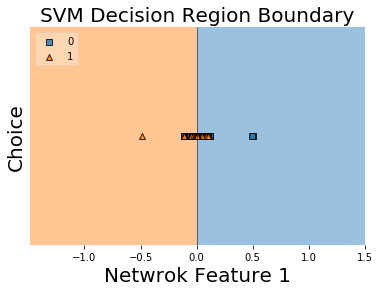

In [27]:
print('SVM start!')
X = df_norm['network_feature_1'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Netwrok Feature 1", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 53.1%


Text(0.5,1,'SVM Decision Region Boundary')

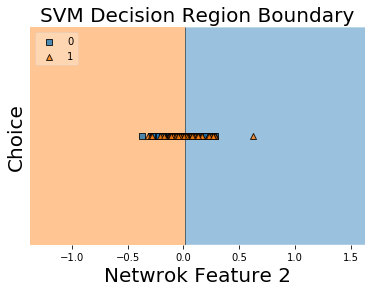

In [28]:
print('SVM start!')
X = df_norm['network_feature_2'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Netwrok Feature 2", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

SVM start!
CNN-SVM Accuracy: 56.3%


Text(0.5,1,'SVM Decision Region Boundary')

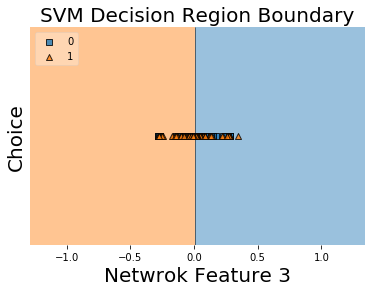

In [29]:
print('SVM start!')
X = df_norm['network_feature_3'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=60)
clf = LinearSVC()
classifier(clf, Xtrain, Ttrain, Xtest, Ttest, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")
plt.xlabel("Netwrok Feature 3", size=20)
plt.ylabel("Choice", size=20)
plt.title('SVM Decision Region Boundary', size=20)

#  Logistic Regression

Optimization terminated successfully.
         Current function value: 0.655461
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                 0.05412
Time:                        21:24:11   Log-Likelihood:                -3605.0
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -23.6517      1.519    -15.569      0.000     -26.629     -20.674

Accuracy using Logistic Regr

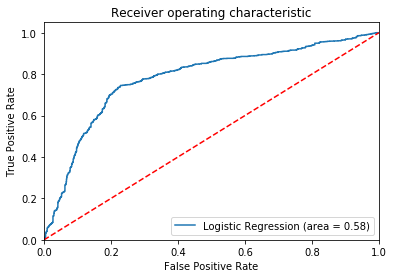

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['follower_count'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.690225
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.003959
Time:                        21:24:19   Log-Likelihood:                -3796.2
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.2374      0.794     -5.340      0.000      -5.793      -2.682

Accuracy using Logistic Regr

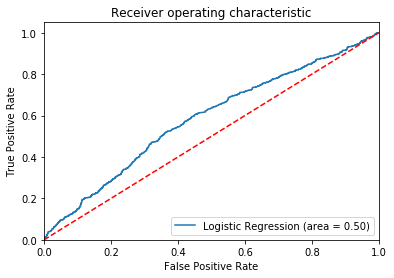

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['following_count'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.611691
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                  0.1173
Time:                        21:24:28   Log-Likelihood:                -3364.3
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -92.9067      4.020    -23.113      0.000    -100.785     -85.028

Accuracy using Logistic Regr

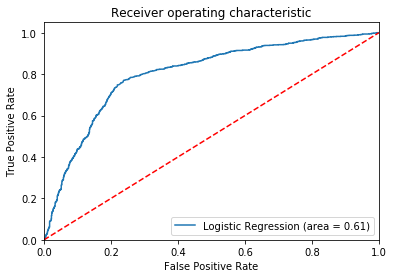

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['listed_count'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.690153
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.004063
Time:                        21:24:35   Log-Likelihood:                -3795.8
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -20.4698      4.447     -4.603      0.000     -29.186     -11.753
Accuracy of logistic regressi

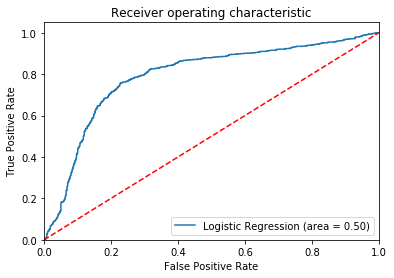

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['mentions_received'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
logit_model=sm.Logit(T,X)
result=logit_model.fit()
print(result.summary())
logreg = LogisticRegression()
logreg.fit(Xtrain, Ttrain)
y_pred = logreg.predict(Xtest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xtest, Ttest)))

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ttest, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(Ttest, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Ttest, logreg.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ttest, logreg.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.689091
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.005596
Time:                        21:24:42   Log-Likelihood:                -3790.0
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -26.7414      4.766     -5.611      0.000     -36.082     -17.401

Accuracy using Logistic Regr

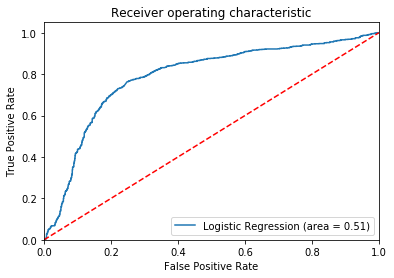

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['retweets_received'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.674357
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                 0.02686
Time:                        21:24:57   Log-Likelihood:                -3709.0
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.8344      0.364    -13.267      0.000      -5.549      -4.120

Accuracy using Logistic Regr

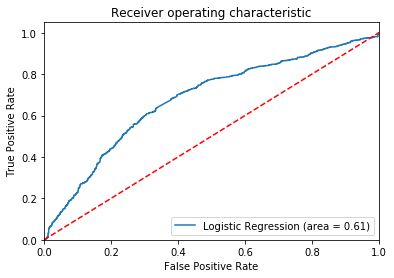

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['mentions_sent'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.667180
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                 0.03721
Time:                        21:25:05   Log-Likelihood:                -3669.5
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.2027      0.414    -14.981      0.000      -7.014      -5.391

Accuracy using Logistic Regr

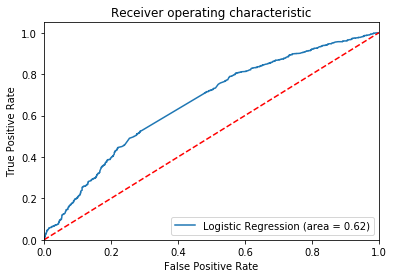

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['retweets_sent'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.680954
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                 0.01734
Time:                        21:26:43   Log-Likelihood:                -3745.2
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -5.1708      0.496    -10.423      0.000      -6.143      -4.198

Accuracy using Logistic Regr

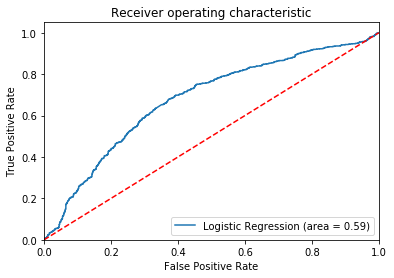

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['posts'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.680583
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                 0.01787
Time:                        21:25:30   Log-Likelihood:                -3743.2
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -26.3481      2.869     -9.185      0.000     -31.971     -20.725

Accuracy using Logistic Regr

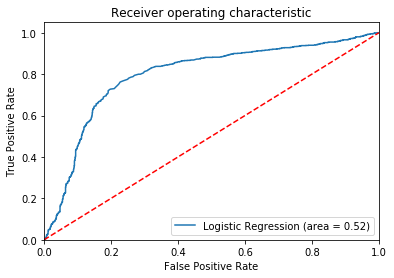

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['network_feature_1'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.689085
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.005604
Time:                        21:25:38   Log-Likelihood:                -3790.0
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.6314      0.556     -6.529      0.000      -4.722      -2.541

Accuracy using Logistic Regr

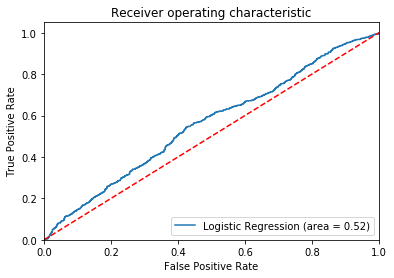

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['network_feature_2'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimization terminated successfully.
         Current function value: 0.686763
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.008954
Time:                        21:25:46   Log-Likelihood:                -3777.2
converged:                       True   LL-Null:                       -3811.3
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.8583      0.893     -7.676      0.000      -8.609      -5.107

Accuracy using Logistic Regr

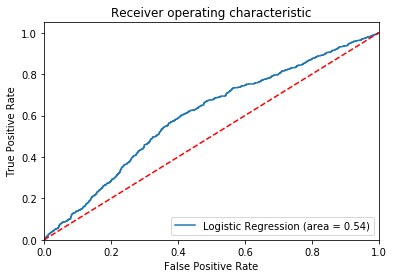

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
X = df_norm['network_feature_3'].values.reshape(-1,1) 
T = df['Choice']
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.4, random_state=0)

model=sm.Logit(T,X)
result=model.fit()
print(result.summary())

lr = LogisticRegression()
lr.fit(Xtrain, Ttrain)
y_pred = lr.predict(Xtest)
print("")
print('Accuracy using Logistic Regression: {:.2f}'.format(lr.score(Xtest, Ttest)))

kfold = model_selection.KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(crossv, Xtrain, Ttrain, cv=kfold, scoring=scoring)
print("")
print("Accuracy using 10 cross fold cross validation: %.3f" % (results.mean()))

confusion_matrix = confusion_matrix(Ttest, y_pred)
print("")
print("Confusion Matrix")
print(confusion_matrix)

print("")
print("Classification Report")
print(classification_report(Ttest, y_pred))

print("")
print("ROC")
roc_auc = roc_auc_score(Ttest, lr.predict(Xtest))
front, back, thresholds = roc_curve(Ttest, lr.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(front, back, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()